# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [8]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

OSError: handle is closed

ERROR:root:Exception calling application: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/opt/conda/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.6899999845772982


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
from unityagents import UnityEnvironment

env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Started training...
Epoch: 1, score: 0.20999999530613422
Epoch: 2, score: 0.29999999329447746
Epoch: 3, score: 0.6799999848008156
Epoch: 4, score: 0.6199999861419201
Epoch: 5, score: 0.6499999854713678
Epoch: 6, score: 0.9399999789893627
Epoch: 7, score: 0.20999999530613422
Epoch: 8, score: 0.5799999870359898
Epoch: 9, score: 0.8299999814480543
Epoch: 10, score: 1.9199999570846558
Epoch: 10, average score: 0.6939999844878912
Epoch: 11, score: 1.459999967366457
Epoch: 12, score: 1.3199999704957008
Epoch: 13, score: 0.0
Epoch: 14, score: 1.6599999628961086
Epoch: 15, score: 0.8999999798834324
Epoch: 16, score: 3.1699999291449785
Epoch: 17, score: 3.3399999253451824
Epoch: 18, score: 1.4999999664723873
Epoch: 19, score: 1.459999967366457
Epoch: 20, score: 1.9699999559670687
Epoch: 20, average score: 1.1859999734908342
Epoch: 21, score: 1.769999960437417
Epoch: 22, score: 3.589999919757247
Epoch: 23, score: 1.4799999669194221
Epoch: 24, score: 4.099999908357859
Epoch: 25, score: 2.83999993

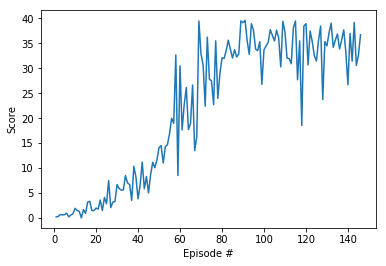

In [3]:
import torch
import numpy as np
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
# number of agents
num_agents = len(env_info.agents)
# size of each action
action_size = brain.vector_action_space_size
# state space: states.shape[0]-no. of agents, state of 1st agent: states[0], 
states = env_info.vector_observations
state_size = states.shape[1] # state size


scores_window = deque(maxlen=100)
scores = []


epochs = 1000   # Number of iterations
max_t  = 10000  # Maximum length of an episode


agent = Agent(state_size, action_size, 0)


def training():
    print("Started training...")
    epoch = 0
    for epoch in range(1,epochs+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # reset the agent
        agent.reset()
        # get initial state 
        states = env_info.vector_observations
        
        score = 0
        
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name] #.cpu().data.numpy() 
            
            next_states = env_info.vector_observations[0]
            rewards = env_info.rewards[0]
            dones = env_info.local_done[0]
            
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            score += rewards
            
            if dones:
                break
            
        scores.append(score)         # Scores for plot
        scores_window.append(score)  # Just first agent
                    
        print("Epoch: {}, score: {}".format(epoch, score))
            
        if epoch%10==0:
            print("Epoch: {}, average score: {}".format(epoch, np.mean(scores_window)))
            
        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(epoch, np.mean(scores_window)))
            torch.save(agent.critic_local.state_dict(),  'critic.pth')
            torch.save(agent.critic_target.state_dict(), 'critic_target.pth')
            torch.save(agent.actor_local.state_dict(),   'actor.pth')
            torch.save(agent.actor_target.state_dict(),  'actor_target.pth')
            break


# Start training
training()

# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()